In [1]:
from bezier_curve import bezier_curve
import nibabel as nib
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def nonlinear_transformation(slices):
    y_vals = []

    points_1 = [[-1, -1], [-1, -1], [1, 1], [1, 1]]
    xvals_1, yvals_1 = bezier_curve(points_1, nTimes=100000)
    xvals_1 = np.sort(xvals_1)
    y_vals.append(yvals_1)

    points_2 = [[-1, -1], [-0.5, 0.5], [0.5, -0.5], [1, 1]]
    xvals_2, yvals_2 = bezier_curve(points_2, nTimes=100000)
    xvals_2 = np.sort(xvals_2)
    yvals_2 = np.sort(yvals_2)
    y_vals.append(yvals_2)

    points_3 = [[-1, -1], [-0.5, 0.5], [0.5, -0.5], [1, 1]]
    xvals_3, yvals_3 = bezier_curve(points_3, nTimes=100000)
    xvals_3 = np.sort(xvals_3)
    y_vals.append(yvals_3)

    points_4 = [[-1, -1], [-0.75, 0.75], [0.75, -0.75], [1, 1]]
    xvals_4, yvals_4 = bezier_curve(points_4, nTimes=100000)
    xvals_4 = np.sort(xvals_4)
    yvals_4 = np.sort(yvals_4)
    y_vals.append(yvals_4)

    points_5 = [[-1, -1], [-0.75, 0.75], [0.75, -0.75], [1, 1]]
    xvals_5, yvals_5 = bezier_curve(points_5, nTimes=100000)
    xvals_5 = np.sort(xvals_5)
    y_vals.append(yvals_5)

    """
    slices, nonlinear_slices_2, nonlinear_slices_4 are source-similar images
    nonlinear_slices_1, nonlinear_slices_3, nonlinear_slices_5 are source-dissimilar images
    """
    nonlinear_slices_1 = np.interp(slices, xvals_1, yvals_1)
    nonlinear_slices_1[nonlinear_slices_1 == 1] = -1
    
    nonlinear_slices_2 = np.interp(slices, xvals_2, yvals_2)

    nonlinear_slices_3 = np.interp(slices, xvals_3, yvals_3)
    nonlinear_slices_3[nonlinear_slices_3 == 1] = -1

    nonlinear_slices_4 = np.interp(slices, xvals_4, yvals_4)

    nonlinear_slices_5 = np.interp(slices, xvals_5, yvals_5)
    nonlinear_slices_5[nonlinear_slices_5 == 1] = -1

    print(len(y_vals))
    
    c = 0
    for y_val in y_vals:
        fig, ax = plt.subplots(1, 1)
        ax.plot(y_val)
        ax.axis('off')
        fig.savefig(f'/works/{c}.png')
        c += 1

    return slices, nonlinear_slices_1, nonlinear_slices_2, \
           nonlinear_slices_3, nonlinear_slices_4, nonlinear_slices_5

In [3]:
def norm(slices):
    max = np.max(slices)
    min = np.min(slices)
    slices = 2 * (slices - min) / (max - min) - 1
    return slices

In [4]:
img_data = nib.load('/works/data/BRATS-2018/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_20_1/Brats18_2013_20_1_t2.nii')
seg_data = nib.load('/works/data/BRATS-2018/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_20_1/Brats18_2013_20_1_seg.nii')

In [5]:
img = img_data.get_fdata()
seg = seg_data.get_fdata()
idx = 100

In [6]:
slices = img[:, :, idx]
seg_img = seg[:, :, idx]

5


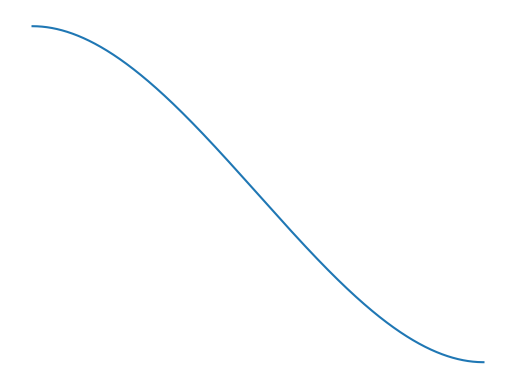

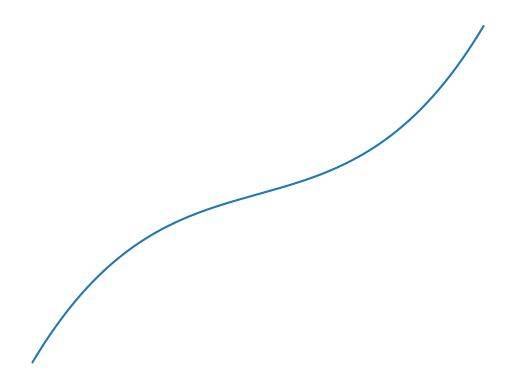

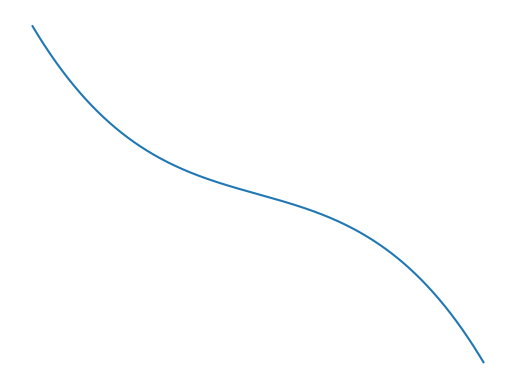

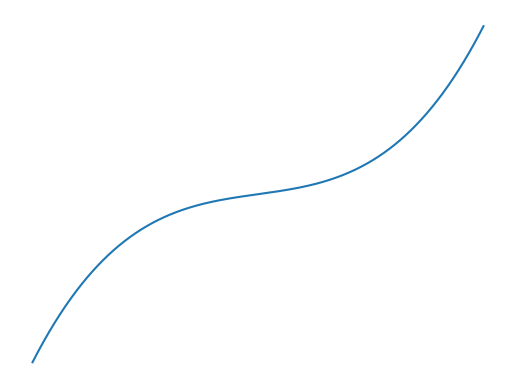

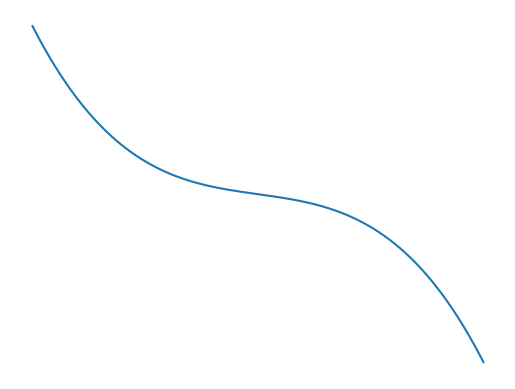

In [7]:
slices = norm(slices)
plt.imsave(f'/works/row.png', slices, cmap='gray')
trans_img = nonlinear_transformation(slices)

c = 0
for img in trans_img:
    plt.imsave(f'/works/img_{c}.png', img, cmap='gray')
    c += 1